In [9]:

import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly  # ex 2


import scipy.optimize as resol

import time
import scipy.linalg as la

## Exercice1

In [3]:
NE = len(TE)
h = (b-a)/(NE-1)
T = np.linspace(a,b,NE)

# Construction du système tridiagonal

A = np.ones(NE-3)
B = 4*np.ones(NE-2)
C = A

K = np.zeros(NE-1)
for i in range(1,NE-1):
    K[i]=TE[i+1]-2*TE[i]+TE[i-1]
    
    K= (6.0/h**2)*K[i:NE-1]
    
    #Résolution du système tridiagonal 
    
    M =np.zeros(NE)
    
    M[i:NE-1]=ResolSystTriDiag(A,B,C,D) # Rappel : M_1 = M_n =0
    
    #Calcule de coefficient 
    
    

NameError: name 'TE' is not defined

In [10]:
def MatriceSpline(n):
    
    SD = np.ones( n-3 )  # Sous-diagonale et sur-diagonale
    D = 4*np.ones( n-2 ) # Diagonale
    T = np.diag(SD, -1) + np.diag(D, 0) + np.diag(SD, 1)
    
    return T

def SecondMembreSpline(y, h):
    
    n = len(y)
    K = np.zeros( n-1 )
    for i in range(1, n-1):   # attention, en ecriture analytique, on démarre à i=1, en Python 0
        K[i] = y[i+1] - 2*y[i] + y[i-1]
    K = (6./h**2) * K[1:n-1]
    
    return K

def CoeffSplineCubique(a, b, y):
    
    n = len(y)
    h = (b-a) / (n-1)          # pas equireparti
    x = np.linspace(a, b, n)   # support equireparti
    
    # matrice tridiagonale
    T = MatriceSpline(n)
    # Second membre
    K = SecondMembreSpline(y, h)
    # Solution de TM = K
    M = np.zeros( n )          # inclu donc les conditions portant sur la définition de la spline naturelle M_0=M_n=0
    M[1:n-1] = la.solve(T, K)  # le système à résoudre permet de déterminer M_1 à M_n-1
    
    # Coefficients de la Spline
    S = np.zeros( (n-1,4) )
    for i in range(n-1):
        S[i,0] = ( M[i+1]-M[i] )/h                                 # Correspond à Ai
        S[i,1] = M[i]                                              # Correspond à Bi
        S[i,2] = ( y[i+1]-y[i] )/h - (h/6)*( M[i+1]+2*M[i] )       # Correspond à Ci
        S[i,3] = y[i]                                              # Correspond à Di

    return(S)

def GraphSpline(a, b, y):
    x = np.linspace(a, b, len(y))       # Grille des abscisses équiréparties
    S = CoeffSplineCubique(a, b, y)     # Calcul des coefficients de la spline cubique
    
    for i in range(len(y)-1):
        X = np.linspace(x[i], x[i+1], 30)  # Sous intervalle [x_i,x_(i+1)]
        # Calcul des polynômes (x-x_i), (x-x_i)^2 et (x-x_i)^3
        affine = [-x[i],1]                     # vecteur des coefficients relatifs à (x-x_i)
        carre = poly.polymul(affine,affine)
        cube = poly.polymul(carre,affine)

        # Evaluation des polynômes précédents sur [x_i,x_(i+1)]
        Eaffine = poly.polyval(X, affine)
        Ecarre = poly.polyval(X, carre)
        Ecube = poly.polyval(X, cube)

        # Calcul de la spline cubique sur [x_i,x_(i+1)]
        P = S[i,0]*Ecube/6 + S[i,1]*Ecarre/2 + S[i,2]*Eaffine + S[i,3]
        
        # Représentation de la spline sans caractéristique couleur ni label (attention)
        plt.plot(X, P, label='intervalle '+str(i))
        # Représentation des points de support
        plt.plot(x,y,'bo')
    
    return

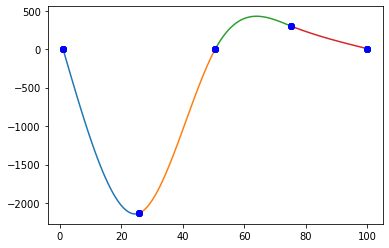

In [17]:
GraphSpline(1,100,[1,-2132,0,299,6])